Decision Tree

In [48]:
# !pip install pydotplus

In [49]:
# !pip install graphviz

In [50]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [51]:
df = pd.read_csv('../00_Data/06_CorrelationDrop.csv')
df = df[df['active_months'] < 120]


def classify_active_months(num):

    if num > 96:
        value = 'LT1'
    else:
        value = 'OTH'

    return value

df['active_months'] = df['active_months'].apply(lambda x:classify_active_months(x))
df.head(3)

,Gender,Term Sub Reason,Location,Age Bucket,Manager ID,Talent,Department,active_months
0,1,1,1,2,102292,5,2,OTH
1,1,1,1,2,100411,5,3,OTH
2,0,1,1,2,102304,5,5,OTH


In [52]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [54]:
scaler = StandardScaler()
XS_train = scaler.fit_transform(X_train)
XS_test = scaler.transform(X_test)

In [55]:
model_knn = KNeighborsClassifier()
model_knn.fit(XS_train, y_train)
model_knn.score(XS_test, y_test)

0.9230769230769231

In [56]:
model_tree = DecisionTreeClassifier()
model_tree.fit(XS_train, y_train)
model_tree.score(XS_test, y_test)

0.8717948717948718

In [57]:
X_train

,Gender,Term Sub Reason,Location,Age Bucket,Manager ID,Talent,Department
331,1,3,1,2,101321,5,12
254,1,11,1,4,100270,5,20
332,1,1,1,2,101458,5,43
233,0,5,1,2,100633,5,7
475,0,11,1,3,101693,5,21
...,...,...,...,...,...,...,...
55,1,1,1,2,100186,5,2
205,1,1,1,4,101076,5,27
530,0,1,1,2,100784,5,7
43,1,1,1,2,100186,5,2


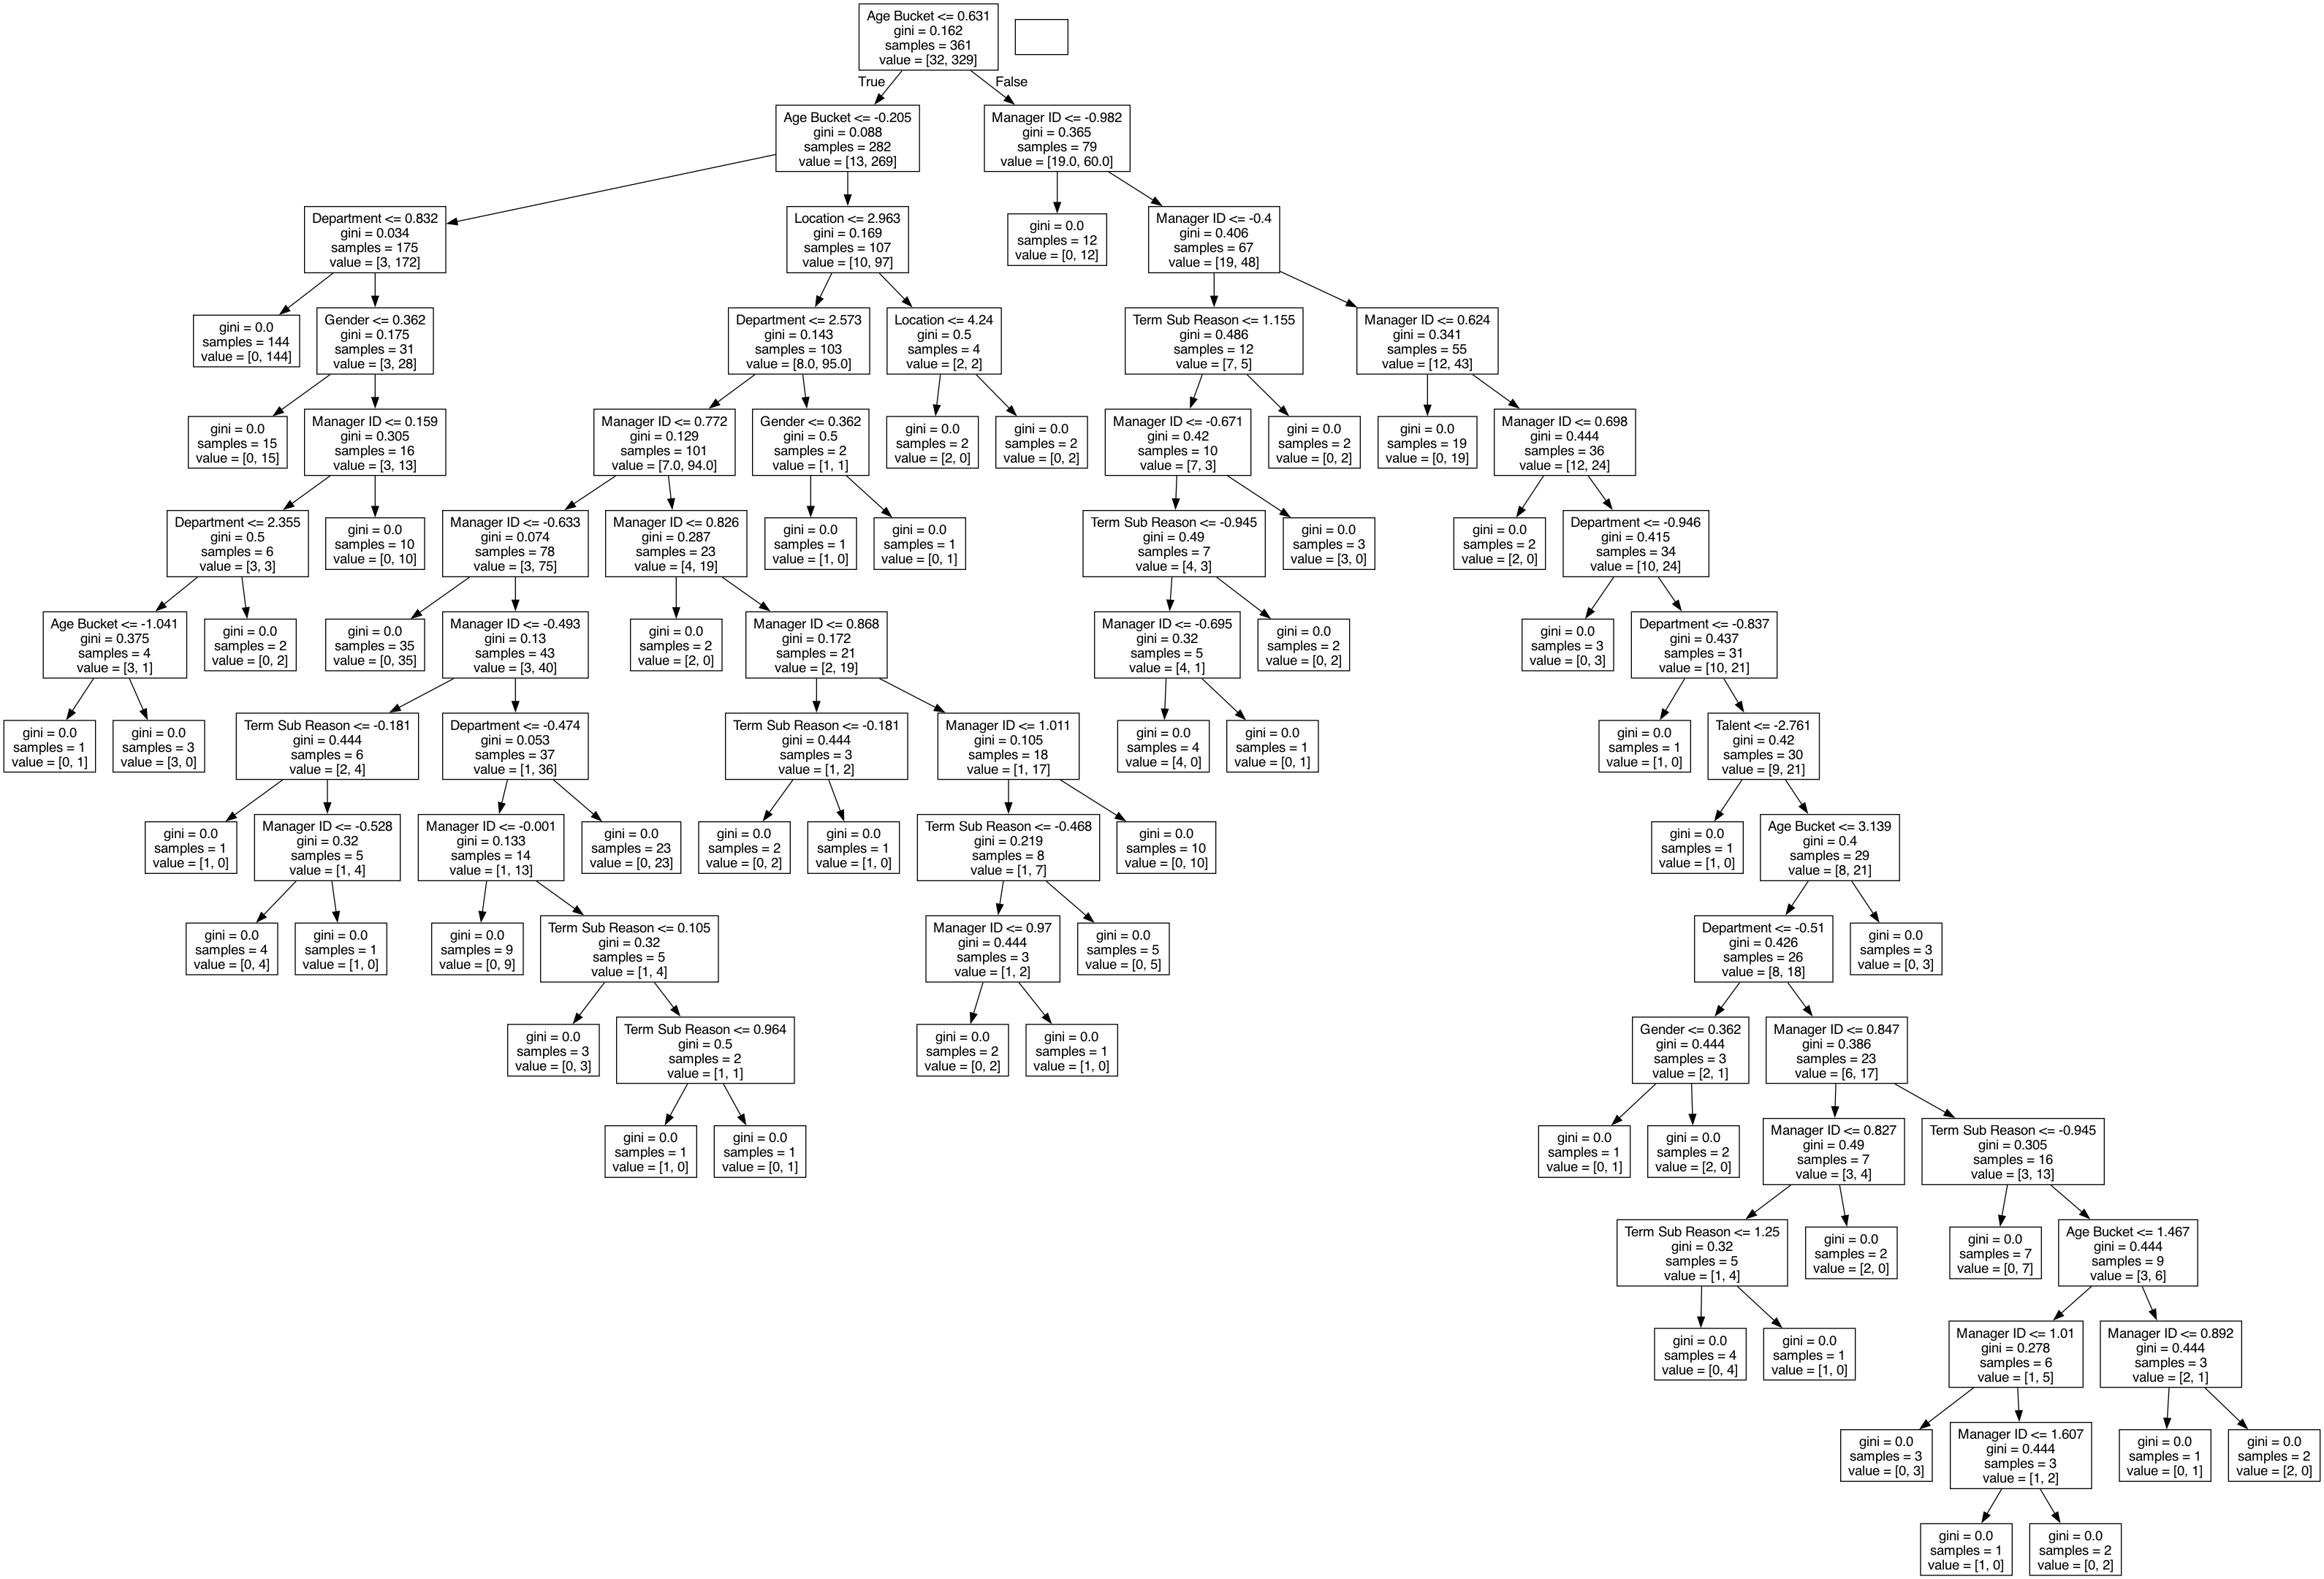

In [58]:
dot_data = StringIO()
export_graphviz(model_tree, out_file=dot_data, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decistion_tree.png')
Image(graph.create_png())

In [59]:
model_rf = RandomForestClassifier()
model_rf.fit(XS_train, y_train)
model_rf.score(XS_test, y_test)

0.9358974358974359